<a href="https://colab.research.google.com/github/Chung-collab/great/blob/master/Map_by_geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
#Refer GeoPandas 0.9.0 at https://geopandas.org/index.html and Part 1 - Introduction to Geographic Data Science.ipynb at https://colab.research.google.com/github/shakasom/GDS/blob/master/Part1%20-%20Introduction.ipynb#scrollTo=A91qAwyjOTs8
!apt install gdal-bin python-gdal python3-gdal #install geopython libraries
!apt install python3-rtree #install python3-rtree - Geopandas requirement
!pip install git+git://github.com/geopandas/geopandas.git #install geopandas
!pip install descartes #install descartes - Geopandas requirement

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-bvoen2wj
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-bvoen2wj
  Created wheel for geopandas: filename=geopandas-0.9.0+36.gcb88dd4-py2.py3-none-any.whl size=996489 sha256=85bb19f1977a649c2e1c8050fcc14bf090fb5a5a216652c13ff7fe2e81c9f30c
  Stored in directory: /tmp/pip-ephem-wheel-cache-iyhxxjxb/wheels/91/24/71/376c9c67192694168352

In [108]:
#import tools: NumPy for Advanced linear algebra, Matplotlib for Visualization and data plotting, Pandas for Data manipulation and analysis, Geopandas for programming geospatial data in python,  matplotlib.pyplot for plotting map
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt

In [109]:
#Read the world data and show the header
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [110]:
#Read the capitals data and show the header
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
capitals.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1328: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



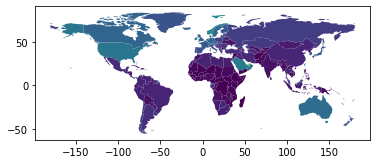

In [111]:
#plot a Map of GDP per capita without using pyplot
world = world[(world.pop_est>0) & (world.name!="Antarctica")] #exclude negative population and Antarctica
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap')

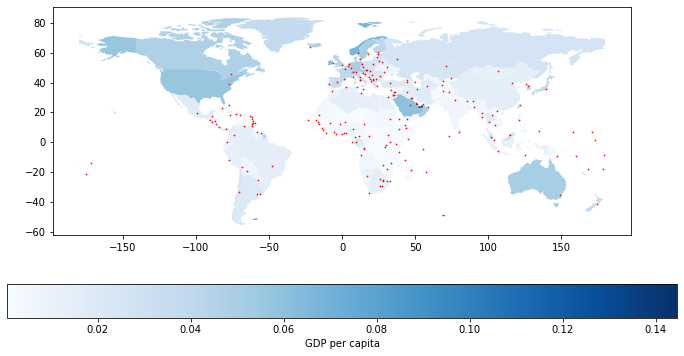

In [112]:
#Use pyplot (plt) to plot a world map with capital markers and shaded by gdp per capita with a scale bar
fig, ax = plt.subplots(figsize=(12,6))
world.plot(column='gdp_per_cap', cmap='Blues', ax=ax, legend=True, legend_kwds={'label': "GDP per capita", 'orientation': "horizontal"})
capitals.plot(markersize=0.5, color='red', ax=ax)
plt.show()

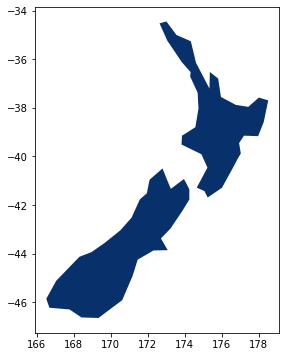

In [113]:
#Use pyplot (plt) to plot a country map such as New Zealand 
fig, ax_nz = plt.subplots(figsize=(8,6))
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "New Zealand"].plot(cmap='Blues_r', ax=ax_nz)
plt.show()